Source data: yfinance
- BBCA (04/12/2020 - 04/12/2022)
- BBNI (04/12/2020 - 04/12/2022)
- BUMI (04/12/2020 - 04/12/2022)
- INDY (04/12/2020 - 04/12/2022)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime
from IPython.display import Markdown
from sklearn.preprocessing import MinMaxScaler

from pandas_datareader.data import DataReader
from datetime import datetime

# standard scaler and isolationforest used for outlier detection
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# prediction using LSTM
from keras.models import Sequential
from keras.layers import Dense, LSTM

sns.set_theme(style="whitegrid")

In [2]:
stock_list = ['bbca', 'bbni', 'bumi', 'indy', 'sido']
stock_code = ['BBCA', 'BBNI', 'BUMI', 'INDY', 'SIDO']
stock_ma = ['bbca_ma', 'bbni_ma', 'bumi_ma', 'indy_ma', 'sido_ma']
com_list = []

for x, y, z in zip(stock_list, stock_code, stock_ma):
    globals()[x] = pd.read_csv(f"C:\\Users\\LENOVO\\Stocks_exploration\\Stocks-Exploration\\data\\{y}_04_12_2022.csv", encoding='utf-8')
    globals()[x]['Date'] = pd.to_datetime(globals()[x]['Date'])
    globals()[x]['Volume'] = globals()[x]['Volume'].astype(int)
    globals()[z] = globals()[x]
    globals()[z] =  globals()[z].set_index('Date')
    com_list.append(globals()[z])
     
df = pd.concat(com_list, axis=0)

bbca.head()

,Date,Open,High,Low,Close,Volume
0,2020-01-02,6695.0,6780.0,6680.0,6690.0,49445000
1,2020-01-03,6750.0,6800.0,6725.0,6800.0,47755500
2,2020-01-06,6720.0,6750.0,6690.0,6735.0,27300000
3,2020-01-07,6735.0,6770.0,6730.0,6740.0,45022500
4,2020-01-08,6670.0,6745.0,6670.0,6680.0,53692500


In [3]:
bbca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    715 non-null    datetime64[ns]
 1   Open    715 non-null    float64       
 2   High    715 non-null    float64       
 3   Low     715 non-null    float64       
 4   Close   715 non-null    float64       
 5   Volume  715 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(1)
memory usage: 30.8 KB


In [4]:
chart1 = f'Open Price {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, and {stock_code[3]} 2020-2022'

Markdown("""
## {title}
""".format(title=chart1))


## Open Price BBCA, BBNI, BUMI, and INDY 2020-2022


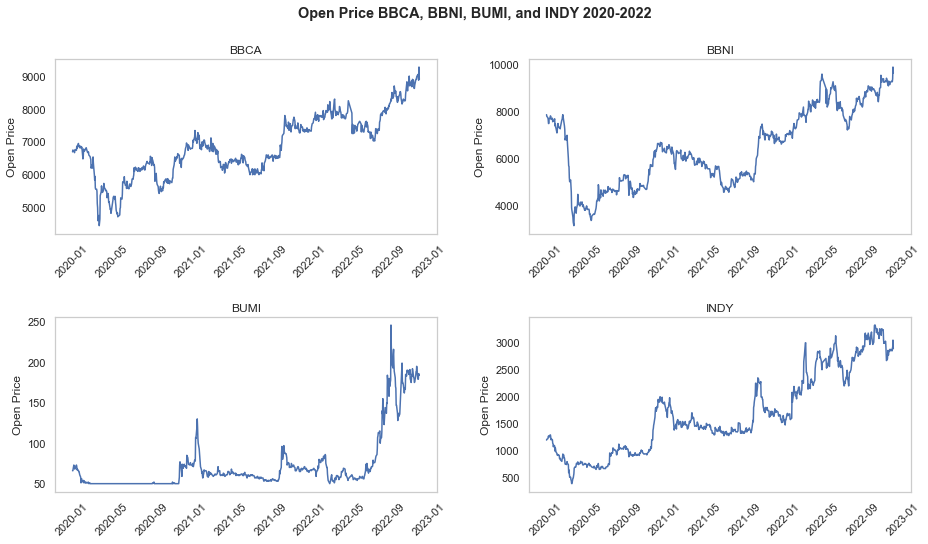

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle(f'{chart1}', fontweight='bold')

for x, y, ax in zip(stock_list, stock_code, axes.ravel()):
    ax.plot('Date', 'Open',data=globals()[x])
    ax.set_title(y)
    ax.grid(False)
    ax.set_ylabel('Open Price')
    ax.tick_params(axis='x', rotation=45)

plt.show()

In [6]:
chart2 = f'Close Price {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, and {stock_code[3]} 2020-2022'

Markdown("""
## {title}
""".format(title=chart2))


## Close Price BBCA, BBNI, BUMI, and INDY 2020-2022


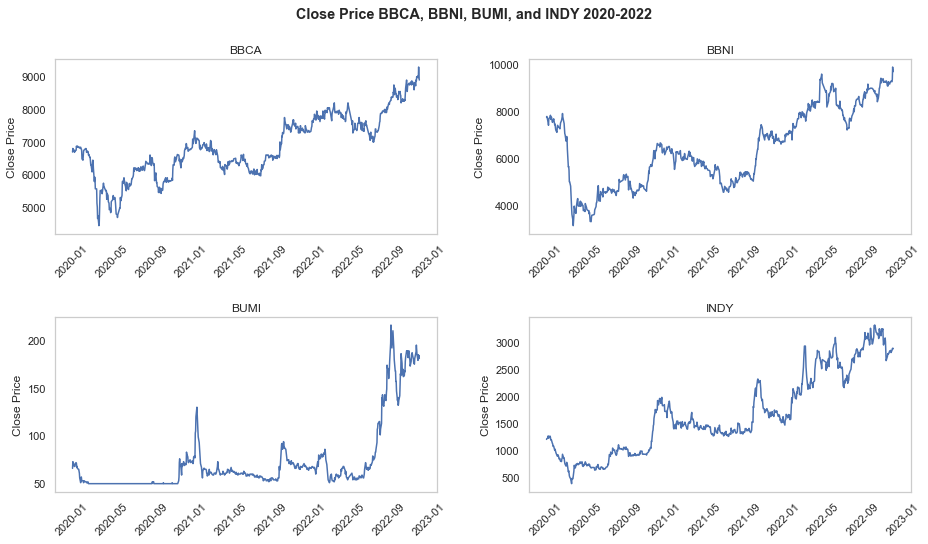

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle(f'{chart2}', fontweight='bold')

for x, y, ax in zip(stock_list, stock_code, axes.ravel()):
    ax.plot('Date', 'Close',data=globals()[x])
    ax.set_title(y)
    ax.grid(False)
    ax.set_ylabel('Close Price')
    ax.tick_params(axis='x', rotation=45)

plt.show()

In [8]:
chart3 = f'Volume {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, and {stock_code[3]} 2020-2022'

Markdown("""
## {title}
""".format(title=chart3))


## Volume BBCA, BBNI, BUMI, and INDY 2020-2022


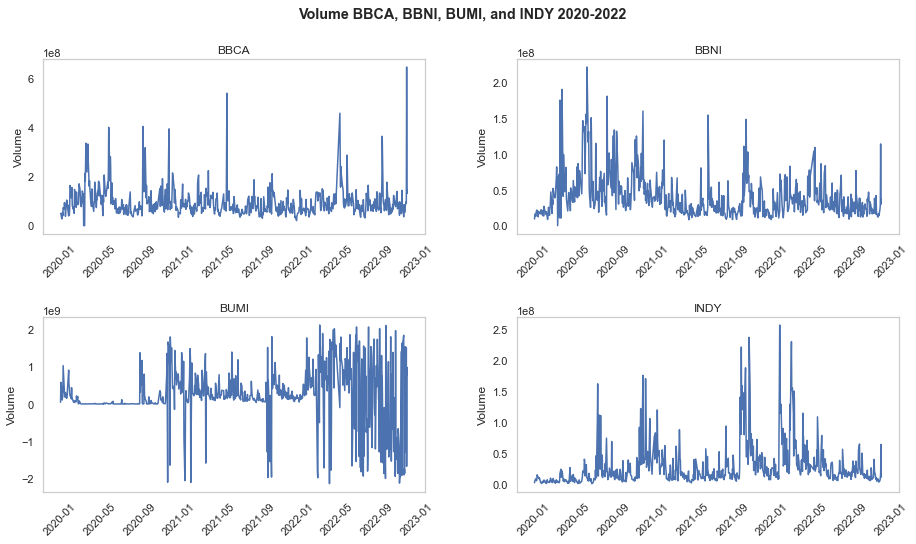

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle(f'{chart3}', fontweight='bold')

for x, y, ax in zip(stock_list, stock_code, axes.ravel()):
    ax.plot('Date', 'Volume',data=globals()[x])
    ax.set_title(y)
    ax.grid(False)
    ax.set_ylabel('Volume')
    ax.tick_params(axis='x', rotation=45)

plt.show()

In [10]:
chart4 = 'Distribution of Close Price 2020-2022'

Markdown("""
## {title}
""".format(title=chart4))


## Distribution of Close Price 2020-2022


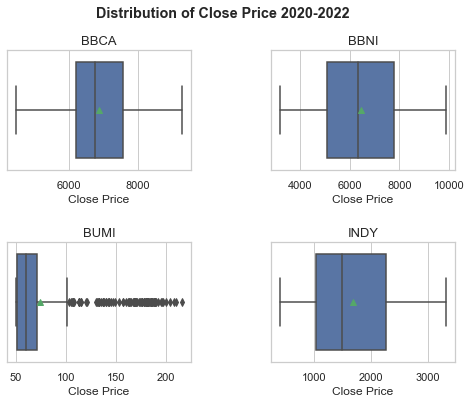

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
fig.tight_layout()
fig.tight_layout(pad=4)

fig.suptitle(f'{chart4}', fontweight='bold')

g_stock = ['g_bbca', 'g_bbni', 'g_bumi', 'g_indy']

for x, y, z, ax in zip(stock_list, g_stock, stock_code, axes.flatten()):
    y = sns.boxplot(x='Close', data=globals()[x], showmeans=True, ax=ax)
    y.set_title(z ,fontweight="normal", size=13, y=1)
    y.set_xlabel('Close Price', fontsize = 12)

plt.show()

In [12]:
chart5 = 'Average Close Price Per Month'

Markdown("""
## {title}
""".format(title=chart5))


## Average Close Price Per Month


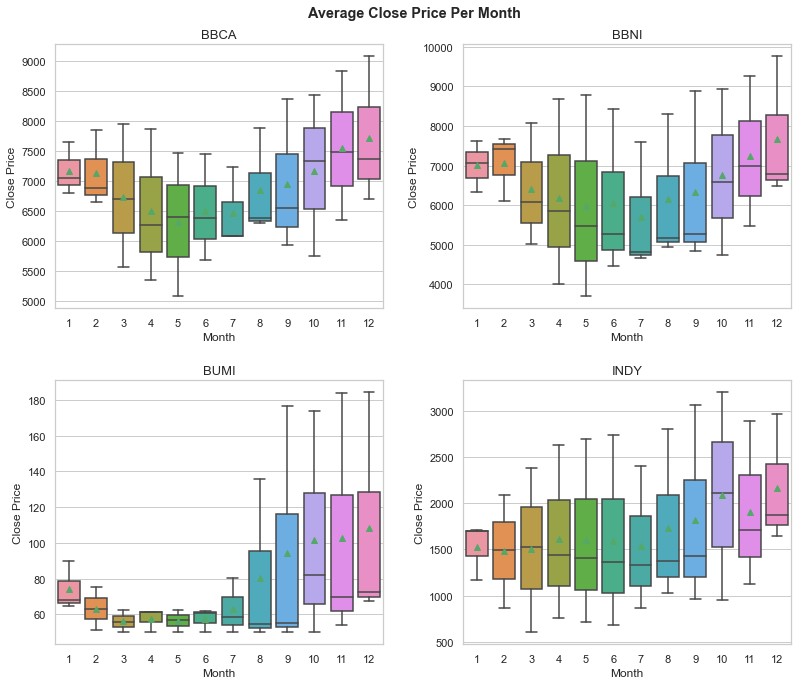

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()
fig.tight_layout(pad=4)

stock_resample = ['bbca_sample', 'bbni_sample', 'bumi_sample', 'indy_sample']

for x, y in zip(stock_list, stock_resample):
    globals()[y] = globals()[x].resample('M', on='Date').mean()

fig.suptitle(f'{chart5}', fontweight='bold')

for x, y, z, ax in zip(stock_resample, g_stock, stock_code, axes.flatten()):
    y = sns.boxplot(y="Open",x=globals()[x].index.month, data=globals()[x], showmeans=True, ax=ax)
    y.set_title(z, fontweight="normal", size=13, y=1)
    y.set_xlabel('Month', fontsize = 12)
    y.set_ylabel('Close Price')
    
plt.show()

In [14]:
chart6 = 'Correlation of Month and Year Based on Average Closing Price'

Markdown("""
## {title}
""".format(title=chart6))


## Correlation of Month and Year Based on Average Closing Price


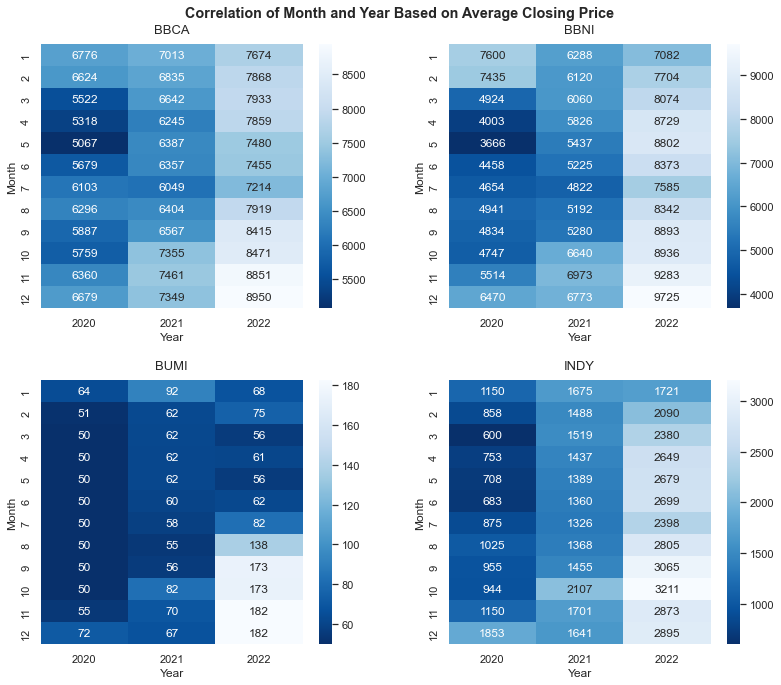

In [15]:
stock_pivot =['bbca_pivot', 'bbni_pivot', 'bumi_pivot', 'indy_pivot']

for x, y in zip(stock_pivot, stock_resample):
    globals()[y]["Bulan"] = globals()[y].index.month
    globals()[y]["Tahun"] = globals()[y].index.year
    globals()[x] = globals()[y].pivot("Bulan", "Tahun", "Close")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()
fig.tight_layout(pad=4)

fig.suptitle(f'{chart6}', fontweight='bold')

for x, y, z, ax in zip(stock_pivot, g_stock, stock_code, axes.flatten()):
    y = sns.heatmap(data=globals()[x], annot=True, fmt=".0f", cmap = 'Blues_r', ax=ax)
    y.set_title(z, fontweight="normal", size=13, y=1.02)
    y.set_xlabel('Year', fontsize = 12)
    y.set_ylabel('Month')
    
plt.show()

In [16]:
stocks_code = ['BBCA.JK', 'BBNI.JK', 'BUMI.JK', 'INDY.JK']

# now = dt.now().strftime('%Y-%m-%d')

closing_df = DataReader(stocks_code, 'yahoo', '2020-01-01', '2022-11-30')['Close']

closing_df.rename(columns = {'BBCA.JK':'BBCA', 'BBNI.JK':'BBNI', 'BUMI.JK':'BUMI', 'INDY.JK':'INDY'}, inplace = True)
closing_df.head()

stock_rets = closing_df.pct_change()
stock_rets.head()

Symbols,BBCA,BBNI,BUMI,INDY
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,0.016442,0.003215,0.106061,0.012397
2020-01-06,-0.009559,-0.022436,-0.054795,0.008163
2020-01-07,0.000742,-0.009836,0.000000,0.032389
2020-01-08,-0.008902,-0.016556,-0.014493,-0.023529


In [17]:
chart7 = 'Stocks Correlation Based on Percentage Change of Closing Price'

Markdown("""
## {title}
""".format(title=chart7))


## Stocks Correlation Based on Percentage Change of Closing Price


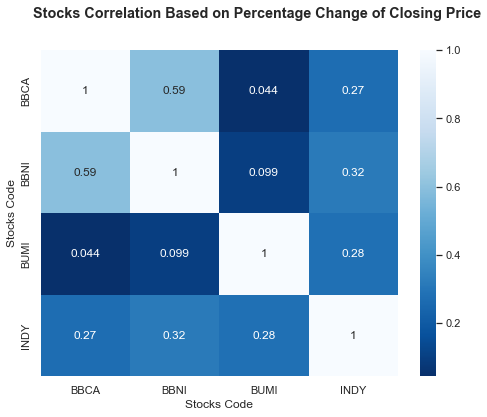

In [18]:
plt.figure(figsize=(8, 6))

plt.suptitle(f'{chart7}', fontweight='bold')

g = sns.heatmap(stock_rets.corr(), annot=True, cmap = 'Blues_r')
g.set(ylabel='Stocks Code', xlabel='Stocks Code')

plt.show()

In [19]:
closing_df.head()

Symbols,BBCA,BBNI,BUMI,INDY
Date,,,,
2020-01-02,6690.0,7775.0,66.0,1210.0
2020-01-03,6800.0,7800.0,73.0,1225.0
2020-01-06,6735.0,7625.0,69.0,1235.0
2020-01-07,6740.0,7550.0,69.0,1275.0
2020-01-08,6680.0,7425.0,68.0,1245.0


In [20]:
chart8 = 'Stocks Correlation Based on Closing Price'

Markdown("""
## {title}
""".format(title=chart8))


## Stocks Correlation Based on Closing Price


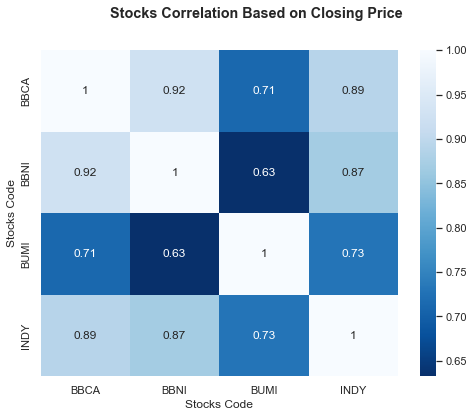

In [21]:
plt.figure(figsize=(8, 6))

plt.suptitle(f'{chart8}', fontweight='bold')

g = sns.heatmap(closing_df.corr(), annot=True, cmap = 'Blues_r')
g.set(ylabel='Stocks Code', xlabel='Stocks Code')

plt.show()

In [22]:
chart9 = f'Moving Averages of {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, and {stock_code[3]} 2020-2022'

Markdown("""
## {title}
""".format(title=chart9))


## Moving Averages of BBCA, BBNI, BUMI, and INDY 2020-2022


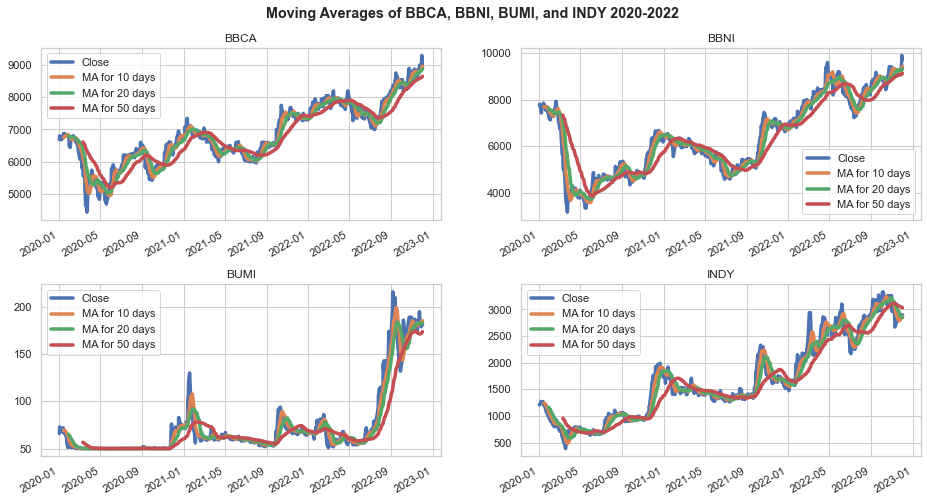

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.tight_layout()
fig.tight_layout(pad=4)

fig.suptitle(f'{chart9}', fontweight='bold')

ma_day = [10, 20, 50]

for ma in ma_day:
    for company in com_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()

for x, y, ax in zip(stock_ma, stock_code, axes.ravel()):
    globals()[x][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=ax, linewidth=3.5)
    ax.set_title(y)
    ax.set_xlabel(None)

plt.show()

In [24]:
chart10 = f'Outlier Detection {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, and {stock_code[3]} 2020-2022'

Markdown("""
## {title}
""".format(title=chart10))


## Outlier Detection BBCA, BBNI, BUMI, and INDY 2020-2022


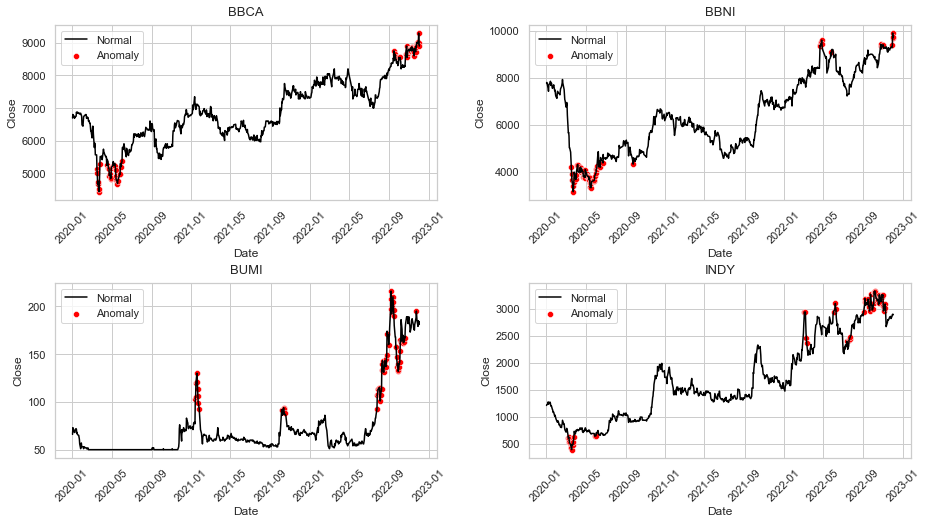

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.tight_layout()
fig.tight_layout(pad=5)

# fig.suptitle(f'{chart10}', fontweight='bold')

for x in stock_ma:
    outliers_fraction = float(.09)
    scaler = StandardScaler()
    np_scaled = scaler.fit_transform(globals()[x].Close.values.reshape(-1, 1))
    data = pd.DataFrame(np_scaled)
    model =  IsolationForest(contamination=outliers_fraction)
    model.fit(data)
    globals()[x]['anomaly'] = model.predict(data) 

for x, y, ax in zip(stock_ma, stock_code, axes.flatten()):
    a = globals()[x].loc[globals()[x]['anomaly'] == -1, ['Close']]
    g = sns.lineplot(data=globals()[x], x="Date", y='Close', color='black', label = 'Normal', ax=ax)
    g.tick_params(axis='x', rotation=45)
    g.set_title(y, fontweight="normal", size=13, y=1.02)
    g2= sns.scatterplot(data=a,x=a.index,y=a['Close'], color='red', label = 'Anomaly', ax=ax)

plt.show()

In [26]:
stock_scaled = ['bbca_scaled', 'bbni_scaled', 'bumi_scaled', 'indy_scaled']
stock_dataset = ['bbca_dataset', 'bbni_dataset', 'bumi_dataset', 'indy_dataset']

for x, y, z in zip(stock_ma, stock_scaled, stock_dataset): 
    data = globals()[x].filter(['Close'])
    globals()[z] = data.values
    training_data_len = int(np.ceil( len(globals()[z]) * .95 ))
    scaler = MinMaxScaler(feature_range=(0,1))
    globals()[y] = scaler.fit_transform(globals()[z])

# training_data_len

In [27]:
# create data train
stock_xtrain = ['bbca_x_train', 'bbni_x_train', 'bumi_x_train', 'indy_x_train']
stock_ytrain = ['bbca_y_train', 'bbni_y_train', 'bumi_y_train', 'indy_y_train']

for x, y, z in zip(stock_scaled, stock_xtrain, stock_ytrain):
    train_data = globals()[x][0:int(training_data_len), :]
    x_train = []
    y_train = []
    
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
    x_train, globals()[z] = np.array(x_train), np.array(y_train)
    globals()[y] = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# bbca_x_train

In [28]:
stock_model = ['bbca_model', 'bbni_model', 'bumi_model', 'indy_model']

for x, y, z in zip(stock_xtrain, stock_model, stock_ytrain):
    globals()[y] = Sequential()
    globals()[y].add(LSTM(128, return_sequences=True, input_shape= (globals()[x].shape[1], 1)))
    globals()[y].add(LSTM(64, return_sequences=False))
    globals()[y].add(Dense(25))
    globals()[y].add(Dense(1))

    globals()[y].compile(optimizer='adam', loss='mean_squared_error')
    globals()[y].fit(globals()[x], globals()[z], batch_size=1, epochs=1)


620/620 [==============================] - 35s 40ms/step - loss: 0.0041


In [29]:
bumi_model

In [30]:
# create data test
# stock_test = ['bbca_test', 'bbni_test', 'bumi_test', 'indy_test']
stock_predictions = ['bbca_pred', 'bbni_pred', 'bumi_pred', 'indy_pred']

for x, y, z, a in zip(stock_predictions, stock_scaled, stock_model, stock_dataset):
    test_data = globals()[y][training_data_len - 60: , :]
    x_test = []
    y_test = globals()[a][training_data_len:, :]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

    x_test = np.array(x_test)

    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

    globals()[x] = globals()[z].predict(x_test)
    globals()[x] = scaler.inverse_transform(globals()[x])

    rmse = np.sqrt(np.mean(((globals()[x] - y_test) ** 2)))
    rmse

2/2 [==============================] - 2s 24ms/step


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3044\406514523.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[y]['Predictions'] = globals()[a]
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3044\406514523.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[y]['Predictions'] = globals()[a]
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3044\406514523.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

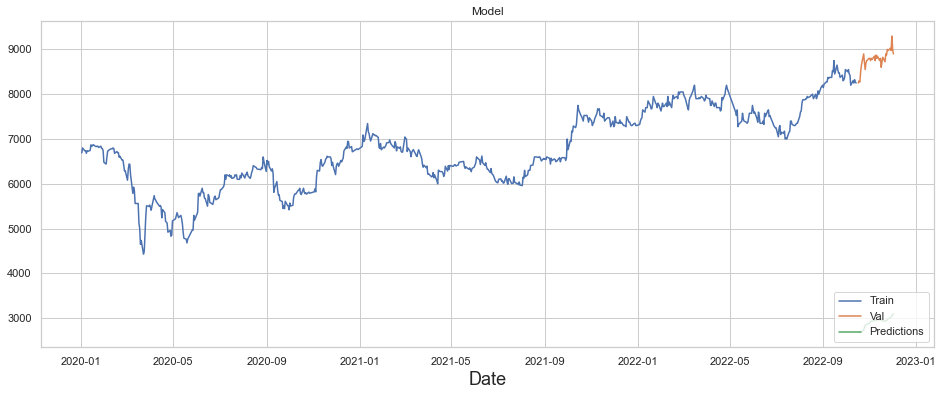

In [31]:
# Plot the data

stock_train = ['bbca_train', 'bbni_train', 'bumi_train', 'indy_train']
stock_valid = ['bbca_valid', 'bbni_valid', 'bumi_valid', 'indy_valid']

for x, y, z, a in zip(stock_train, stock_valid, stock_ma, stock_predictions):
    globals()[x] = globals()[z][:training_data_len]
    globals()[y] = globals()[z][training_data_len:]
    globals()[y]['Predictions'] = globals()[a]


plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.plot(bbca_train['Close'])
plt.plot(bbca_valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [32]:
training_data_len

680